In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import style
style.use("ggplot")

In [66]:
# Combining all the months data
csv_files_list = list(map(lambda file: f"Sales_Data/{file}",os.listdir("Sales_Data")))
data_list = list(pd.read_csv(file) for file in csv_files_list)
sales = pd.concat(data_list, ignore_index=True)

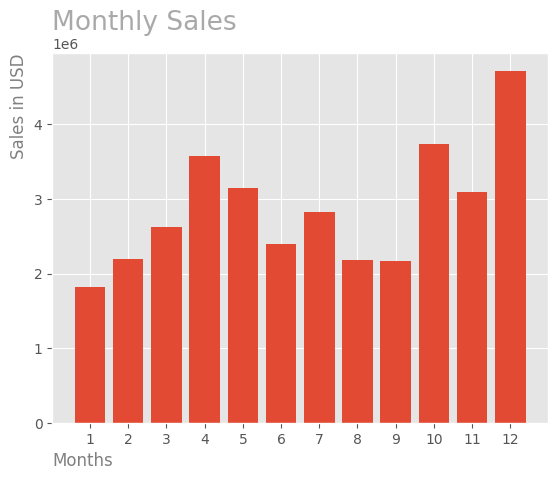

In [67]:
# What was the best month for sales and how much was earned that Month?
sales = sales.loc[sales['Order ID'] != "Order ID"]
sales.dropna(inplace=True)
sales.set_index(pd.to_datetime(sales['Order Date'],format="mixed",dayfirst=False),drop=True,inplace=True)
sales.drop("Order Date",axis=1,inplace=True)
best_month = sales['Quantity Ordered'].astype(float) * sales['Price Each'].astype(float)


# Creating a bar Graph to Answer
months = best_month.resample("BM").sum().sort_values(ascending=False).head(12).index.month # Ou range(1,13) kkkkkk
sales_values = pd.DataFrame(best_month.resample("BM").sum().sort_values(ascending=False).head(12))
plt.bar(months,sales_values[0])
plt.xticks(months)
plt.title("Monthly Sales",loc='left',color='darkgray',fontsize=19)
plt.xlabel("Months",loc="left",color='gray')
plt.ylabel("Sales in USD",loc='top',color='gray')
plt.show()


Order Date
2019-04-19 08:46:00           Dallas
2019-04-07 22:30:00           Boston
2019-04-12 14:38:00      Los Angeles
2019-04-12 14:38:00      Los Angeles
2019-04-30 09:27:00      Los Angeles
                           ...      
2019-09-17 20:56:00      Los Angeles
2019-09-01 16:00:00    San Francisco
2019-09-23 07:39:00    San Francisco
2019-09-19 17:30:00    San Francisco
2019-09-30 00:18:00    San Francisco
Name: Purchase Address, Length: 185950, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'San Francisco CA'),
  Text(1, 0, 'Los Angeles CA'),
  Text(2, 0, 'New York City NY'),
  Text(3, 0, 'Boston MA'),
  Text(4, 0, 'Atlanta GA'),
  Text(5, 0, 'Dallas TX'),
  Text(6, 0, 'Seattle WA'),
  Text(7, 0, 'Portland OR'),
  Text(8, 0, 'Austin TX'),
  Text(9, 0, 'Portland ME')])

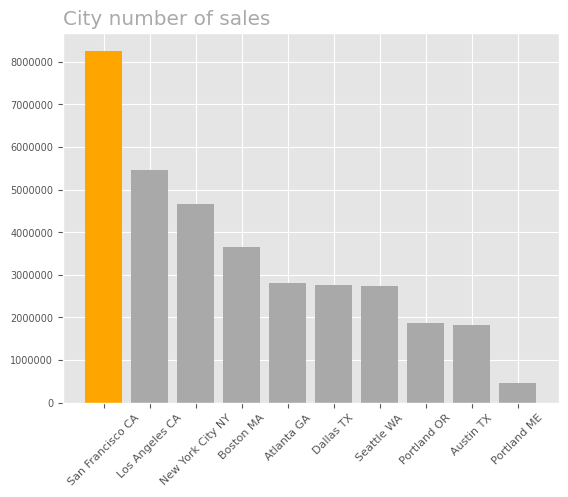

In [94]:
# Which city has the highest number of Sales?
sales['Total Profit'] = sales['Quantity Ordered'].astype(float) * sales['Price Each'].astype(float)

# Extracting the city of the address
sales['City'] = sales['Purchase Address'].apply(lambda addr: addr.split(",")[1].strip() + addr.split(",")[2][0:3])

city_sales = sales.groupby("City")['Total Profit'].sum().sort_values(ascending=False)

plt.bar(city_sales.index,city_sales,color=list(map(lambda city: "orange" if city == "San Francisco CA" else "darkgray",city_sales.index)))
plt.title("City number of sales",loc='left',color='darkgray')
plt.ticklabel_format(style='plain',axis='y')
plt.yticks(fontsize=7)
plt.xticks(rotation=45,fontsize=8)

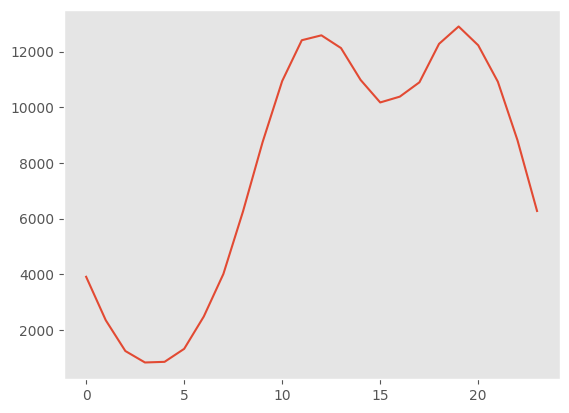

In [110]:
# What time should we display more advertisements?
sales['Hour'] = sales.index.hour
plt.plot(sales.groupby("Hour")['Total Profit'].count())

In [113]:
sales.groupby(sales.index)['Product'].sum().value_counts()

Product
Lightning Charging Cable                                                                        12584
USB-C Charging Cable                                                                            12478
AA Batteries (4-pack)                                                                           12410
AAA Batteries (4-pack)                                                                          12375
Wired Headphones                                                                                10792
                                                                                                ...  
34in Ultrawide MonitorUSB-C Charging Cable34in Ultrawide Monitor20in Monitor                        1
Apple Airpods HeadphonesLightning Charging CableLightning Charging CableUSB-C Charging Cable        1
Wired Headphones34in Ultrawide MonitoriPhone                                                        1
27in FHD MonitorUSB-C Charging CableAA Batteries (4-pack)                 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'iPhone,Lightning Charging Cable'),
  Text(1, 0, 'Google Phone,USB-C Charging Cable'),
  Text(2, 0, 'iPhone,Wired Headphones'),
  Text(3, 0, 'Vareebadd Phone,USB-C Charging Cable'),
  Text(4, 0, 'Google Phone,Wired Headphones')])

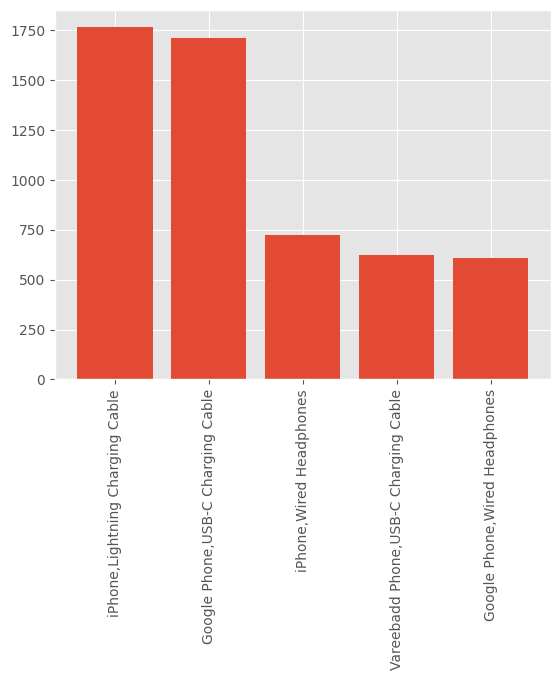

In [127]:
# What products are more often sold together
grouped_products = pd.DataFrame(sales[sales['Order ID'].duplicated(keep=False)].groupby("Order ID")['Product'].transform(lambda product: ",".join(product)))

plt.bar(grouped_products['Product'].value_counts().head().index,grouped_products['Product'].value_counts().head())
plt.xticks(rotation='vertical')